In [2]:
#document term matrix

import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,John,Luke,Mark,Matthew
abased,0,2,0,0
abasedand,0,0,0,1
abba,0,0,1,0
abel,0,1,0,0
abelto,0,0,0,1


In [3]:
# top thirty words
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'John': [('unto', 269),
  ('jesus', 224),
  ('said', 212),
  ('ye', 202),
  ('thou', 142),
  ('shall', 117),
  ('father', 108),
  ('man', 105),
  ('saith', 95),
  ('god', 76),
  ('world', 74),
  ('know', 72),
  ('come', 70),
  ('answered', 63),
  ('son', 62),
  ('hath', 59),
  ('things', 57),
  ('jews', 55),
  ('disciples', 52),
  ('came', 52),
  ('thee', 51),
  ('sent', 51),
  ('went', 48),
  ('say', 46),
  ('believe', 44),
  ('verily', 40),
  ('life', 37),
  ('lord', 37),
  ('saying', 32),
  ('saw', 32)],
 'Luke': [('said', 279),
  ('jesus', 202),
  ('shall', 172),
  ('son', 131),
  ('man', 122),
  ('god', 111),
  ('lord', 87),
  ('came', 73),
  ('things', 72),
  ('ye', 67),
  ('went', 65),
  ('thy', 62),
  ('say', 62),
  ('thee', 56),
  ('thou', 55),
  ('come', 51),
  ('house', 49),
  ('people', 49),
  ('day', 47),
  ('kingdom', 39),
  ('saying', 38),
  ('father', 36),
  ('saw', 36),
  ('great', 34),
  ('disciples', 33),
  ('let', 32),
  ('tell', 32),
  ('good', 31),
  ('called', 3

In [4]:
# print the top 15 words in each gospel
for gospel, top_words in top_dict.items():
    print(gospel)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

John
unto, jesus, said, ye, thou, shall, father, man, saith, god, world, know, come, answered
---
Luke
said, jesus, shall, son, man, god, lord, came, things, ye, went, thy, say, thee
---
Mark
jesus, said, shall, man, ye, came, went, disciples, god, thou, thy, son, things, people
---
Matthew
shall, jesus, ye, said, man, thou, came, thee, thy, son, say, lord, heaven, disciples
---


In [5]:
# to find differences in the gospels, we'll pull out the most common words across the gospels
from collections import Counter
# pull first 30 words
words = []
for gospel in data.columns:
    top = [word for (word, count) in top_dict[gospel]]
    for t in top:
        words.append(t)
        
words

['unto',
 'jesus',
 'said',
 'ye',
 'thou',
 'shall',
 'father',
 'man',
 'saith',
 'god',
 'world',
 'know',
 'come',
 'answered',
 'son',
 'hath',
 'things',
 'jews',
 'disciples',
 'came',
 'thee',
 'sent',
 'went',
 'say',
 'believe',
 'verily',
 'life',
 'lord',
 'saying',
 'saw',
 'said',
 'jesus',
 'shall',
 'son',
 'man',
 'god',
 'lord',
 'came',
 'things',
 'ye',
 'went',
 'thy',
 'say',
 'thee',
 'thou',
 'come',
 'house',
 'people',
 'day',
 'kingdom',
 'saying',
 'father',
 'saw',
 'great',
 'disciples',
 'let',
 'tell',
 'good',
 'called',
 'city',
 'jesus',
 'said',
 'shall',
 'man',
 'ye',
 'came',
 'went',
 'disciples',
 'god',
 'thou',
 'thy',
 'son',
 'things',
 'people',
 'took',
 'say',
 'away',
 'thee',
 'saw',
 'come',
 'heard',
 'john',
 'let',
 'cast',
 'house',
 'hand',
 'peter',
 'kingdom',
 'asked',
 'answered',
 'shall',
 'jesus',
 'ye',
 'said',
 'man',
 'thou',
 'came',
 'thee',
 'thy',
 'son',
 'say',
 'lord',
 'heaven',
 'disciples',
 'come',
 'unto',
 

In [6]:
#aggregate words
Counter(words).most_common()

[('jesus', 4),
 ('said', 4),
 ('ye', 4),
 ('thou', 4),
 ('shall', 4),
 ('man', 4),
 ('god', 4),
 ('come', 4),
 ('son', 4),
 ('things', 4),
 ('disciples', 4),
 ('came', 4),
 ('thee', 4),
 ('went', 4),
 ('say', 4),
 ('saw', 4),
 ('father', 3),
 ('lord', 3),
 ('thy', 3),
 ('kingdom', 3),
 ('unto', 2),
 ('answered', 2),
 ('saying', 2),
 ('house', 2),
 ('people', 2),
 ('day', 2),
 ('let', 2),
 ('good', 2),
 ('took', 2),
 ('away', 2),
 ('cast', 2),
 ('asked', 2),
 ('saith', 1),
 ('world', 1),
 ('know', 1),
 ('hath', 1),
 ('jews', 1),
 ('sent', 1),
 ('believe', 1),
 ('verily', 1),
 ('life', 1),
 ('great', 1),
 ('tell', 1),
 ('called', 1),
 ('city', 1),
 ('heard', 1),
 ('john', 1),
 ('hand', 1),
 ('peter', 1),
 ('heaven', 1),
 ('did', 1),
 ('men', 1)]

In [7]:
# if more than half the gospels use the word we'll exclude it
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['jesus',
 'said',
 'ye',
 'thou',
 'shall',
 'man',
 'god',
 'come',
 'son',
 'things',
 'disciples',
 'came',
 'thee',
 'went',
 'say',
 'saw',
 'father',
 'lord',
 'thy',
 'kingdom']

In [8]:
# use newly create stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# Recreate document-term matrix
cv = CountVectorizer(stop_words=list(stop_words))
data_cv = cv.fit_transform(data_clean.transcripts)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [9]:
# make word clouds
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

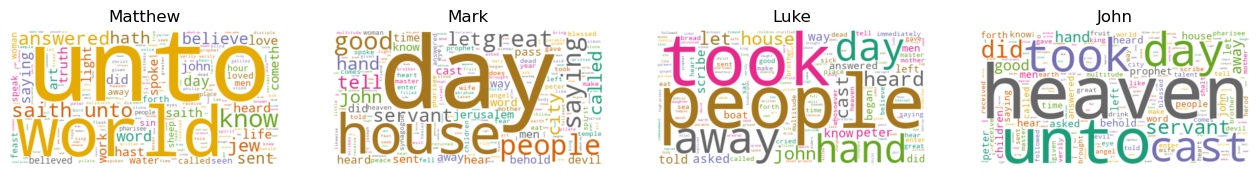

In [10]:
# plots
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

gospel_names = ['Matthew', 'Mark', 'Luke', 'John']

for index, gospel in enumerate(data.columns):
    wc.generate(data_clean.transcripts[gospel])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(gospel_names[index])
    
plt.show()

In [11]:
# Unto isn't a real topic like word so perhaps we should add it to the stop words. 
# Most likely a translator preference in the KJV
# World, House, People, and Heaven seem like the real top topics

# number of unique words in each gospel
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for gospel in data.columns:
    uniques = data[gospel].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(gospel_names, unique_list)), columns=['gospel', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,gospel,unique_words
2,Luke,2180
0,Matthew,2185
3,John,3043
1,Mark,3327


In [12]:
# get the total amount of words per gospel.
# This isn't the most useful data as I'm sure the number of words in each gospel has been measured before

total_list = []
for gospel in data.columns:
    totals = sum(data[gospel])
    total_list.append(totals)

In [13]:
total_list

[7687, 9454, 5742, 9311]

In [16]:
data_total_words = pd.DataFrame(list(zip(gospel_names, total_list)), columns=['gospel', 'total_words'])
data_total_sort = data_total_words.sort_values(by='total_words')
data_total_sort


,gospel,total_words
2,Luke,5742
0,Matthew,7687
3,John,9311
1,Mark,9454


In [19]:
gospel_names


['Matthew', 'Mark', 'Luke', 'John']

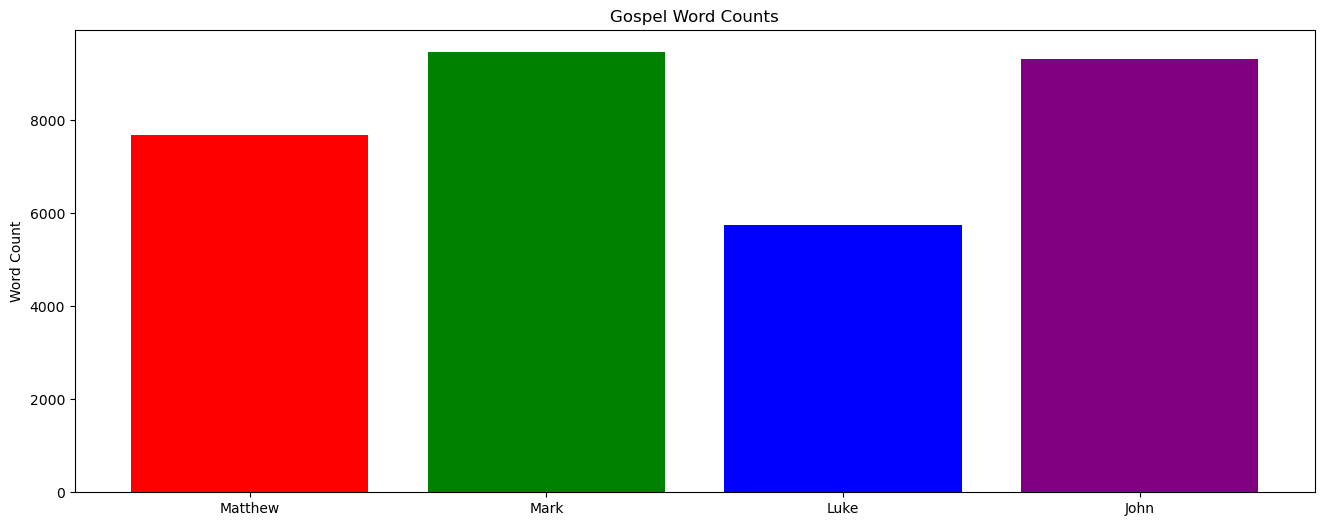

In [20]:
bar_colors = ['red', 'green', 'blue', 'purple']
fig, ax = plt.subplots()

ax.bar(gospel_names, total_list, color=bar_colors)
ax.set_ylabel('Word Count')
ax.set_title('Gospel Word Counts')
plt.show()

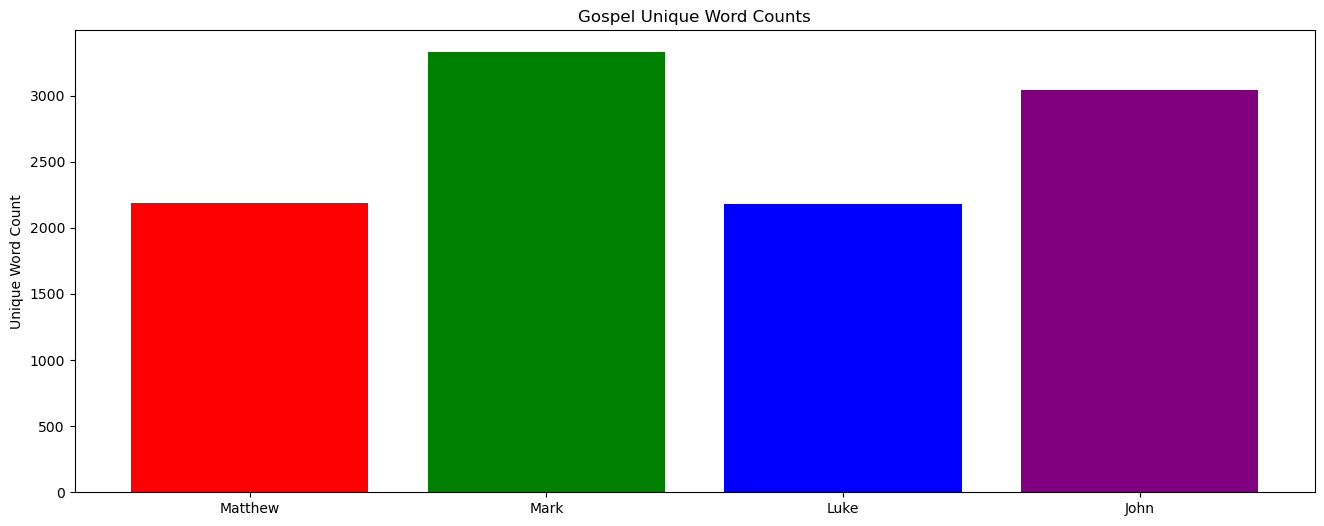

In [21]:
fig, ax = plt.subplots()

ax.bar(gospel_names, unique_list, color=bar_colors)
ax.set_ylabel('Unique Word Count')
ax.set_title('Gospel Unique Word Counts')
plt.show()

In [31]:
unique_list[0]

2185

In [34]:
ratios = [totals / uniques for totals, uniques in zip(total_list, unique_list)]
ratios

[3.5180778032036613, 2.841599038172528, 2.6339449541284403, 3.059809398619783]

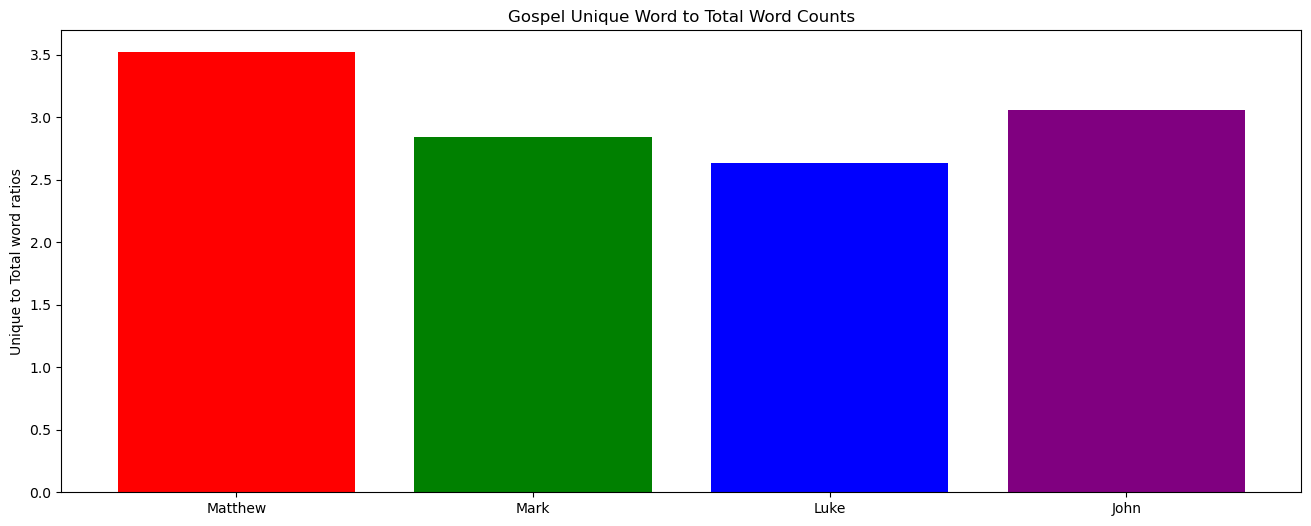

In [35]:
# now let's plot it
fig, ax = plt.subplots()
ax.bar(gospel_names, ratios, color=bar_colors)
ax.set_ylabel('Unique to Total word ratios')
ax.set_title('Gospel Unique Word to Total Word Counts')
plt.show()

In [39]:
# wait was that right? we divided the total words by unique words
# that gives us bars that show the worst ratio as the best
# lets reverse it
good_ratios = [uniques / totals for uniques,totals  in zip(unique_list, total_list)]
good_ratios

[0.2842461298295824,
 0.3519145335307806,
 0.3796586555207245,
 0.32681774245516054]

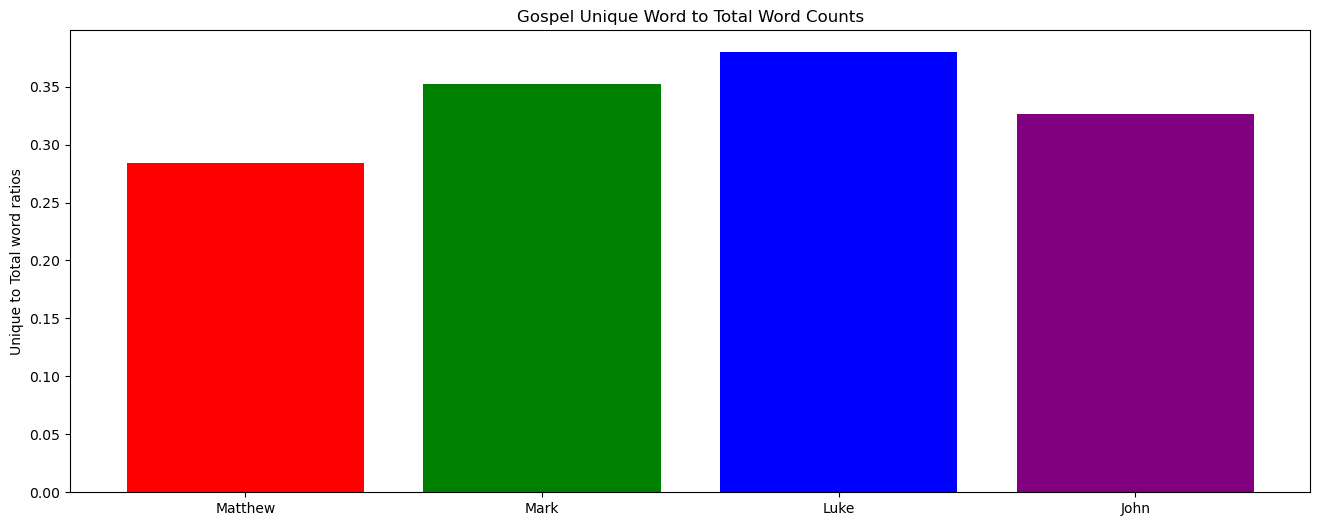

In [40]:
# now let's plot it
fig, ax = plt.subplots()
ax.bar(gospel_names, good_ratios, color=bar_colors)
ax.set_ylabel('Unique to Total word ratios')
ax.set_title('Gospel Unique Word to Total Word Counts')
plt.show()

In [ ]:
# this ratio makes sense now. 
# Luke was mentioned to be a physician so it might make sense for him to be both an efficient writer and wordy writer
# of course this could be a quirk of translation